# Analisis investigasi features yang berpengaruh terhadap nilai Miles per gallon
#### Benedict Aryo
Dataset : 

Metode yang akan digunakan untuk menganalisis data mtcars adalah regresi multipel linear dengan variabel mpg (Miles per Gallon) bertindak sebagai variabel dependen (Y) dan variabel lainnya bertindak sebagai variabel independen (X). Berikut ini deskripsi variabel dalam data mpg:

|column label |explanation|
-----|-----------------|
|mpg |Miles/(US) gallon|
|cyl |Number of cylinders|
|disp|Displacement (cu.in.)|
|hp  |Gross horsepower|
|drat |Rear axle ratio|
|wt |Weight (1000 lbs)|
|qsec| 1/4 mile time|
|vs |V/S|
|am |Transmission (0 = automatic, 1 = manual)|
|gear |Number of forward gears|
|carb |Number of carburetors|

## Import Library and dataset

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Exploratory Data Analysis
Eksplorasi feature-feature yg terdapat pada dataset. <br>
Tujuannya ialah untuk mendapatkan gambaran umum mengenai karakteristik dataset, khususnya untuk menentukan pengaruh feature terhadap variabel 'mpg' atau Miles per Gallon yang akan menjadi topik utama pada study case ini.

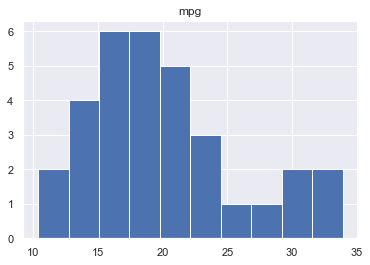

In [71]:
df.hist(column='mpg');

In [10]:
dt=df.sort_values('mpg',ascending=False)
dt.head()
dt

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


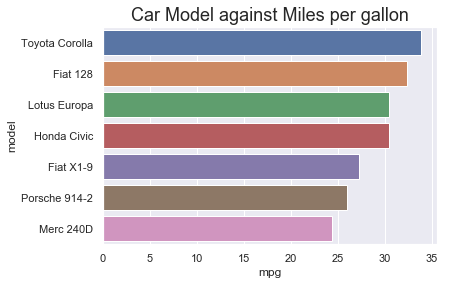

In [75]:
df_top7 = df.sort_values('mpg',ascending=False).head(7)
sns.barplot(x='mpg',y='model',data=df_top7).set_title('Car Model against Miles per gallon',fontsize=18);

In [80]:
# Menambahkan semua model Toyota
df_toyota = df[df['model'].str.contains('Toyota')]
df_toyota

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


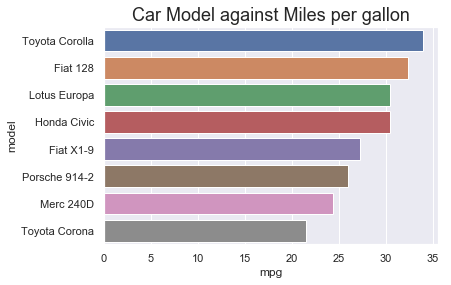

In [79]:
df_top8 = df_top7.append(df_toyota).drop_duplicates().sort_values('mpg',ascending=False)
sns.barplot(x='mpg',y='model',data=df_top8).set_title('Car Model against Miles per gallon',fontsize=18);

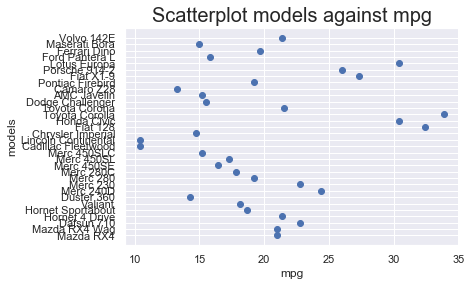

In [97]:
# Cek korelasi dengan scatterplot
plt.scatter(x=df['mpg'],y=df['model'])
plt.title('Scatterplot models against mpg',size=20)
plt.xlabel('mpg')
plt.ylabel('models');

Diketahui bahwa mobil dengan mpg tertinggi adalah __Toyota Corolla__. Namun, apabila kita filter model dengan merk Toyota, ternyata __tidak semua merk Toyota memiliki nilai miles per gallon yang tinggi__. Justru pada mpg merk __Fiat__ dinilai cukup konsisten karena memiliki 2 model yang memiliki __nilai mpg berdekatan pada urutan top 8 besar berdasarkan mpg__. Bahkan, pada scatterplot, kita dapat melihat bahwa tidak terdapat korelasi antara model terhadap mpg.<br>
Sehingga informasi tersebut belum menjawab pertanyaan utama yakni feature apa saja yg paling berpengaruh terhadap nilai dari mpg.

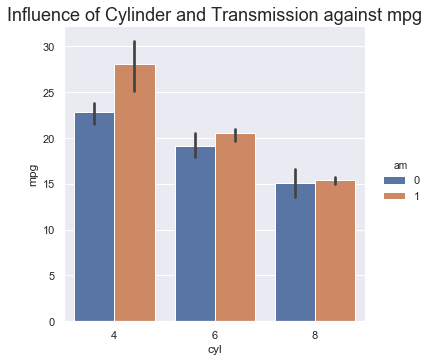

In [46]:
sns.catplot(kind='bar',data=df,y='mpg',x='cyl',hue='am');
plt.title('Influence of Cylinder and Transmission against mpg',fontsize=18);

Berdasarkan grafik di atas, dapat kita ketahui secara umum bahwa nilai mpg tertinggi didapatkan oleh model dengan jumlah cylinder = 4 dan transmisi Manual (am = 1). untuk memastikan apakah variable tersebut sangat berpengaruh terhadap niai mpg, maka diperlukan data observasi data secara kuantitatif lebih lanjut. 

## Data Observation
Sesuai hasil Eksplorasi data sebelumnya, feature / kolom __'model'__ tidak memengaruhi variabel __'mpg'__. maka analisis selanjutnya tidak memerlukan feature kolom model.

In [106]:
# drop model
df = df.drop(columns='model')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Correlation Observation
Menampilkan nilai Pearson Correlation pada setiap features melalui tabel korelasi dan visualisasi.

In [86]:
corr = df.corr()
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


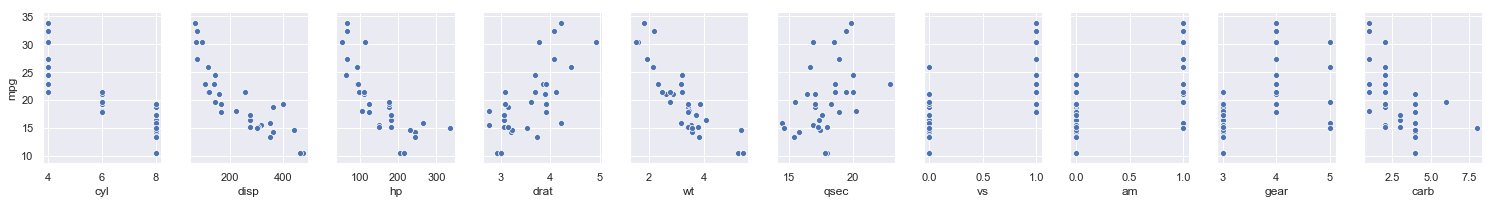

In [87]:
sns.pairplot(df, x_vars=df.columns.drop('mpg'), y_vars='mpg',size=3, aspect=0.7);

### Correlation Series 

In [110]:
corr_ser = abs(pd.Series(corr['mpg']))
corr_ser.sort_values(ascending=False)

mpg     1.000000
wt      0.867659
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
vs      0.664039
am      0.599832
carb    0.550925
gear    0.480285
qsec    0.418684
Name: mpg, dtype: float64